This notebook is a tutorial for demonstrating the functionality of the code for looking at cross calibration of all beams.

I am running it on happili-02 at the moment

In [1]:
#Load all magic and packaged needed
%matplotlib notebook

import sys
sys.path.append('/home/adams/commissioning/crosscal')
import crosscal as cc

import os
import numpy as np
from astropy.io import ascii
import apercal
import casacore.tables as pt
import matplotlib.pyplot as plt

In [2]:
#start apercal logger, because I'll use apercal routines
#and may be helpful to have that record
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import apercal.libs.lib as lib
lib.setup_logger('info', logfile='/home/adams/commissioning/crosscal/log/ccal_tutorial.log')

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/commissioning/crosscal/log/ccal_tutorial.log


In [3]:
#Define files used throughout
obsrecordfile = '/home/adams/commissioning/APERTIF_observation_record_1nov2018.csv'
basedir='/data/adams/apertif/crosscal'
cfgfile='/home/adams/commissioning/crosscal/ccal.cfg'

In [4]:
#Define a set of scans to look at
#these should (for now) go over a set of beam switching observation
#It doesn't have to be a complete cycle
#And can repeat beams, but repetition will not be taken into account
scans = cc.ScanSpecification()
scans.setstartscan('181026063')
scans.setendscan('181026067')

In [5]:
#copy the specified scans over
cc.copy_scans(scans,obsrecordfile,basedir,run=True)

Reminder: Make sure observation record is up-to-date!
In switching scan mode
In running mode, will execute commands
Moved to and copying data to /data/adams/apertif/crosscal/181026063/00/raw
Running python /home/adams/altadata/getdata_alta.py 181026 063-063 00-00
Moved to and copying data to /data/adams/apertif/crosscal/181026064/00/raw
Running python /home/adams/altadata/getdata_alta.py 181026 064-064 01-01
Moved to and copying data to /data/adams/apertif/crosscal/181026065/00/raw
Running python /home/adams/altadata/getdata_alta.py 181026 065-065 02-02
Moved to and copying data to /data/adams/apertif/crosscal/181026066/00/raw
Running python /home/adams/altadata/getdata_alta.py 181026 066-066 03-03
Moved to and copying data to /data/adams/apertif/crosscal/181026067/00/raw
Running python /home/adams/altadata/getdata_alta.py 181026 067-067 04-04


In [6]:
#Update source name to remove any beam numbering
#This is required so that the proper model is identified
cc.fix_source_name(scans,obsrecordfile,basedir) #make sure source is recognized calibrator

Reminder: Make sure observation record is up-to-date!
In switching scan mode
Successful read/write open of default-locked table /data/adams/apertif/crosscal/181026063/00/raw/WSRTA181026063_B000.MS::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /data/adams/apertif/crosscal/181026064/00/raw/WSRTA181026064_B001.MS::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /data/adams/apertif/crosscal/181026065/00/raw/WSRTA181026065_B002.MS::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /data/adams/apertif/crosscal/181026066/00/raw/WSRTA181026066_B003.MS::FIELD: 9 columns, 1 rows
Successful read/write open of default-locked table /data/adams/apertif/crosscal/181026067/00/raw/WSRTA181026067_B004.MS::FIELD: 9 columns, 1 rows


In [7]:
#Flag the scans
#Can specify edges and ghosts options to preflag
#shadowing, AOFlagger will always run
"""
Should add option to flag bad antennas
"""
cc.flag_scans(scans,obsrecordfile,basedir,cfgfile,edges=True,ghosts=True)

Reminder: Make sure observation record is up-to-date!
In switching scan mode


config - INFO :  Configuration file /home/adams/commissioning/crosscal/ccal.cfg successfully read!
apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas


Setting fluxcal to WSRTA181026063_B000.MS
Flagging data set /data/adams/apertif/crosscal/181026063/00/raw/WSRTA181026063_B000.MS


apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging auto-correlations
apercal.modules.preflag - WARNING : No polaris

Setting fluxcal to WSRTA181026064_B001.MS
Flagging data set /data/adams/apertif/crosscal/181026064/00/raw/WSRTA181026064_B001.MS


apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging auto-correlations
apercal.modules.preflag - WARNING : No polaris

Setting fluxcal to WSRTA181026065_B002.MS
Flagging data set /data/adams/apertif/crosscal/181026065/00/raw/WSRTA181026065_B002.MS


apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging auto-correlations
apercal.modules.preflag - WARNING : No polaris

Setting fluxcal to WSRTA181026066_B003.MS
Flagging data set /data/adams/apertif/crosscal/181026066/00/raw/WSRTA181026066_B003.MS


apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging auto-correlations
apercal.modules.preflag - WARNING : No polaris

Setting fluxcal to WSRTA181026067_B004.MS
Flagging data set /data/adams/apertif/crosscal/181026067/00/raw/WSRTA181026067_B004.MS


apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging auto-correlations
apercal.modules.preflag - WARNING : No polaris

In [8]:
#calibrate the scans
cc.calibrate_scans(scans,obsrecordfile,basedir,cfgfile)

Warning! Have you run fix_source_name?
Reminder: Make sure observation record is up-to-date!


config - INFO :  Configuration file /home/adams/commissioning/crosscal/ccal.cfg successfully read!
apercal.modules.ccal - INFO : Starting CROSS CALIBRATION 
apercal.modules.ccal - INFO : Calculating bandpass corrections for flux calibrator


In switching scan mode
Setting fluxcal to WSRTA181026063_B000.MS
Calibrating data set /data/adams/apertif/crosscal/181026063/00/raw/WSRTA181026063_B000.MS


apercal.libs.lib - INFO : ********************************************************************************
         inputs in dir /tmp/drivecasa...
********************************************************************************




Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026063/00/raw/WSRTA181026063_B000.MS: 24 columns, 1404 rows


apercal.modules.ccal - INFO : Calculating gain corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating global delay corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating cross-hand delay corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available. Polarisation calibration will probably not work!
apercal.modules.ccal - INFO : Calculating leakage corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating polarisation angle corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available.Cross calibration will probably not work!
apercal.modules.ccal - INFO : Applying solutions to calibrators
apercal.modules.ccal - ERROR : # Polarised calibrator dataset not specified or dataset not available. Application of cross calibration solutions not possible!
apercal.modules.ccal - INFO : CROSS CALIBRATI

Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026063/00/raw/WSRTA181026063_B000.MS: 25 columns, 1404 rows
Setting fluxcal to WSRTA181026064_B001.MS
Calibrating data set /data/adams/apertif/crosscal/181026064/00/raw/WSRTA181026064_B001.MS


apercal.libs.lib - INFO : ********************************************************************************
         inputs in dir /tmp/drivecasa...
********************************************************************************




Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026064/00/raw/WSRTA181026064_B001.MS: 24 columns, 1248

apercal.modules.ccal - INFO : Calculating gain corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating global delay corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating cross-hand delay corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available. Polarisation calibration will probably not work!
apercal.modules.ccal - INFO : Calculating leakage corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating polarisation angle corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available.Cross calibration will probably not work!
apercal.modules.ccal - INFO : Applying solutions to calibrators
apercal.modules.ccal - ERROR : # Polarised calibrator dataset not specified or dataset not available. Application of cross calibration solutions not possible!
apercal.modules.ccal - INFO : CROSS CALIBRATI

 rows
Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026064/00/raw/WSRTA181026064_B001.MS: 25 columns, 1248 rows
Setting fluxcal to WSRTA181026065_B002.MS
Calibrating data set /data/adams/apertif/crosscal/181026065/00/raw/WSRTA181026065_B002.MS


apercal.libs.lib - INFO : ********************************************************************************
         inputs in dir /tmp/drivecasa...
********************************************************************************




Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026065/00/raw/WSRTA181026065_B002.MS: 24 columns, 1248 rows


apercal.modules.ccal - INFO : Calculating gain corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating global delay corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating cross-hand delay corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available. Polarisation calibration will probably not work!
apercal.modules.ccal - INFO : Calculating leakage corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating polarisation angle corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available.Cross calibration will probably not work!
apercal.modules.ccal - INFO : Applying solutions to calibrators
apercal.modules.ccal - ERROR : # Polarised calibrator dataset not specified or dataset not available. Application of cross calibration solutions not possible!
apercal.modules.ccal - INFO : CROSS CALIBRATI

Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026065/00/raw/WSRTA181026065_B002.MS: 25 columns, 1248 rows
Setting fluxcal to WSRTA181026066_B003.MS
Calibrating data set /data/adams/apertif/crosscal/181026066/00/raw/WSRTA181026066_B003.MS


apercal.libs.lib - INFO : ********************************************************************************
         inputs in dir /tmp/drivecasa...
********************************************************************************




Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026066/00/raw/WSRTA181026066_B003.MS: 24 columns, 1248 rows


apercal.modules.ccal - INFO : Calculating gain corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating global delay corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating cross-hand delay corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available. Polarisation calibration will probably not work!
apercal.modules.ccal - INFO : Calculating leakage corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating polarisation angle corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available.Cross calibration will probably not work!
apercal.modules.ccal - INFO : Applying solutions to calibrators
apercal.modules.ccal - ERROR : # Polarised calibrator dataset not specified or dataset not available. Application of cross calibration solutions not possible!
apercal.modules.ccal - INFO : CROSS CALIBRATI

Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026066/00/raw/WSRTA181026066_B003.MS: 25 columns, 1248 rows
Setting fluxcal to WSRTA181026067_B004.MS
Calibrating data set /data/adams/apertif/crosscal/181026067/00/raw/WSRTA181026067_B004.MS


apercal.libs.lib - INFO : ********************************************************************************
         inputs in dir /tmp/drivecasa...
********************************************************************************




Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026067/00/raw/WSRTA181026067_B004.MS: 24 columns, 1248 rows


apercal.modules.ccal - INFO : Calculating gain corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating global delay corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating cross-hand delay corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available. Polarisation calibration will probably not work!
apercal.modules.ccal - INFO : Calculating leakage corrections for flux calibrator
apercal.modules.ccal - INFO : Calculating polarisation angle corrections for polarised calibrator
apercal.modules.ccal - ERROR : Polarised calibrator dataset not specified or dataset not available.Cross calibration will probably not work!
apercal.modules.ccal - INFO : Applying solutions to calibrators
apercal.modules.ccal - ERROR : # Polarised calibrator dataset not specified or dataset not available. Application of cross calibration solutions not possible!
apercal.modules.ccal - INFO : CROSS CALIBRATI

Successful readonly open of default-locked table /data/adams/apertif/crosscal/181026067/00/raw/WSRTA181026067_B004.MS: 25 columns, 1248 rows


Reminder: Make sure observation record is up-to-date!
In switching scan mode
Reminder: Make sure observation record is up-to-date!
In switching scan mode
plotting model amplitudes


<IPython.core.display.Javascript object>


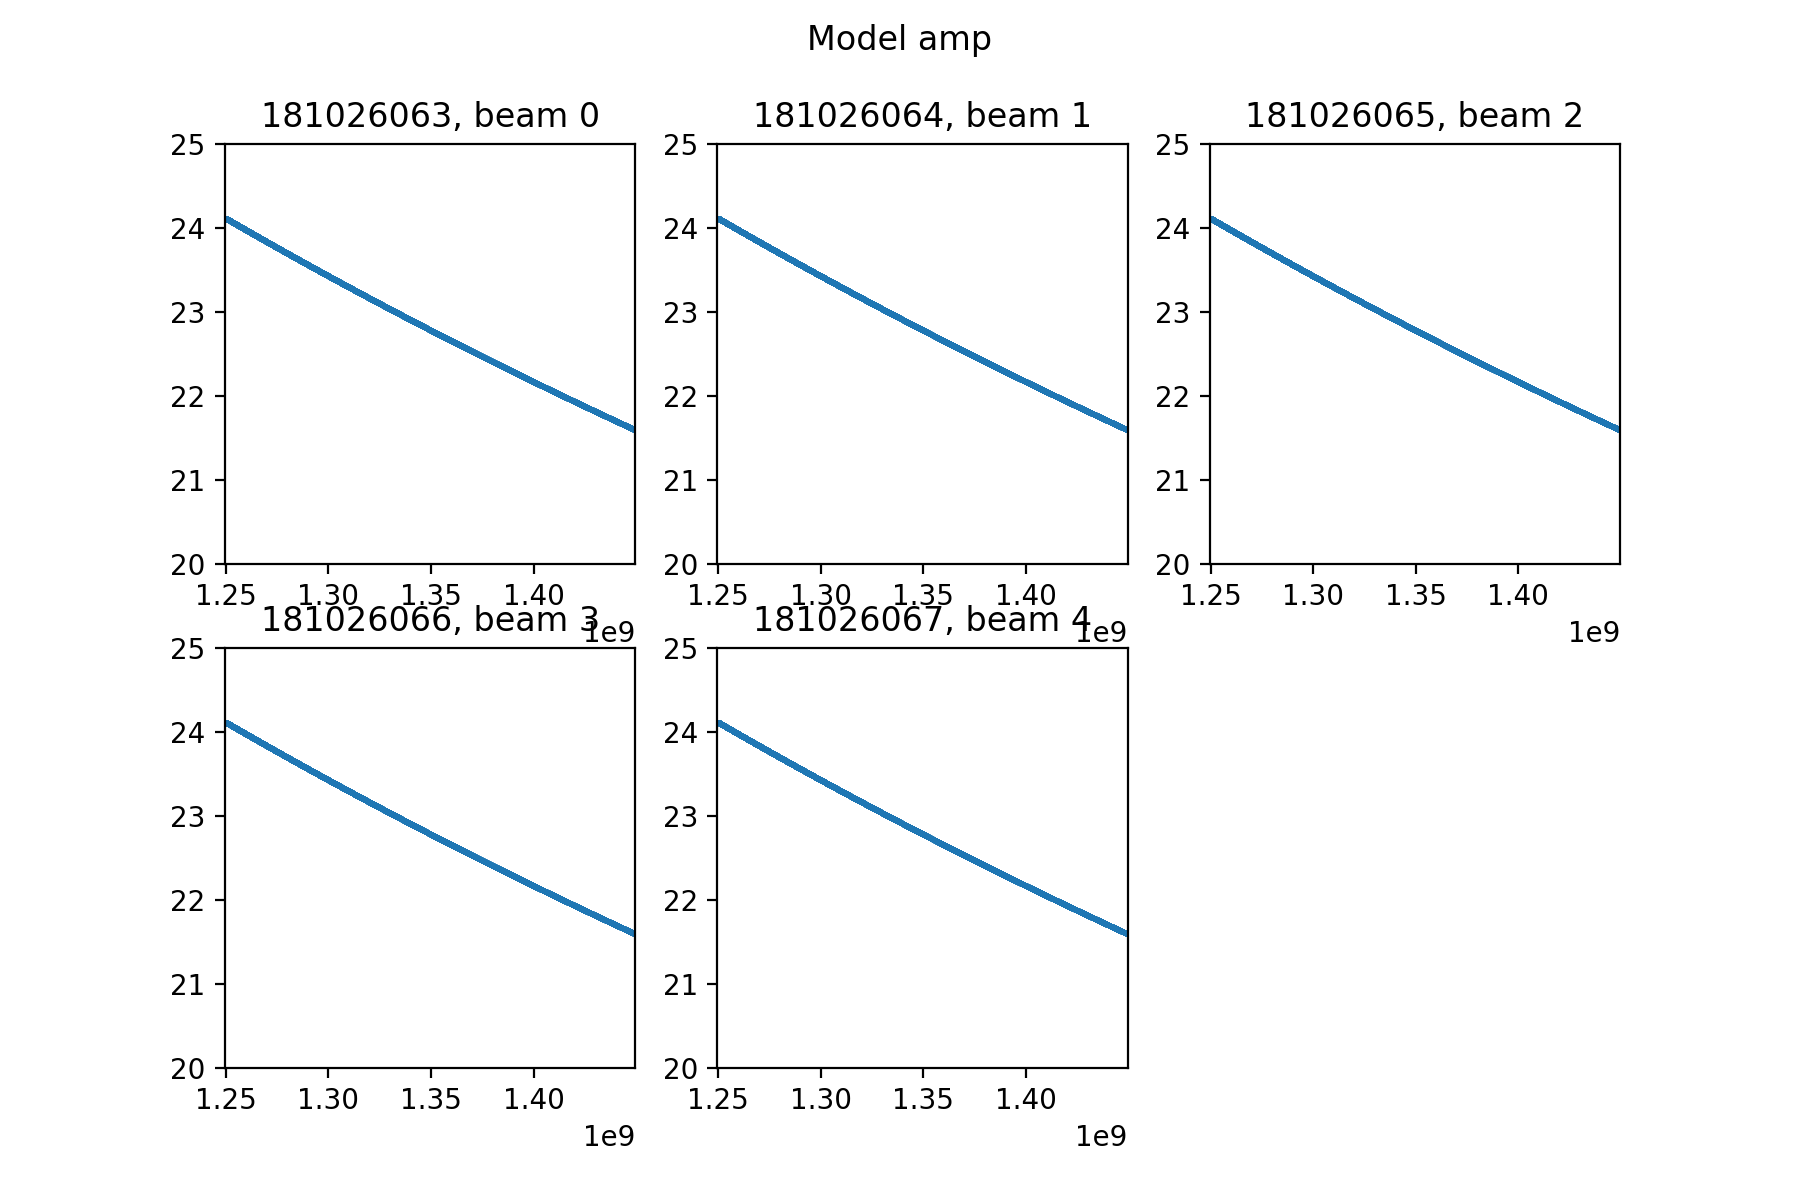

In [7]:
#plot the model for scans
#this serves as a check that the source renaming and calibration were properly done
fig = cc.plot_compare_scan_model(scans,obsrecordfile,basedir,plotmode='amp',
                           pol=0,nx=3,plotsize=3,ymin=20,ymax=25)

plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_model_amp.png')

Reminder: Make sure observation record is up-to-date!
In switching scan mode
Reminder: Make sure observation record is up-to-date!
In switching scan mode
Will normalize solutions
plotting amplitude solutions


<IPython.core.display.Javascript object>


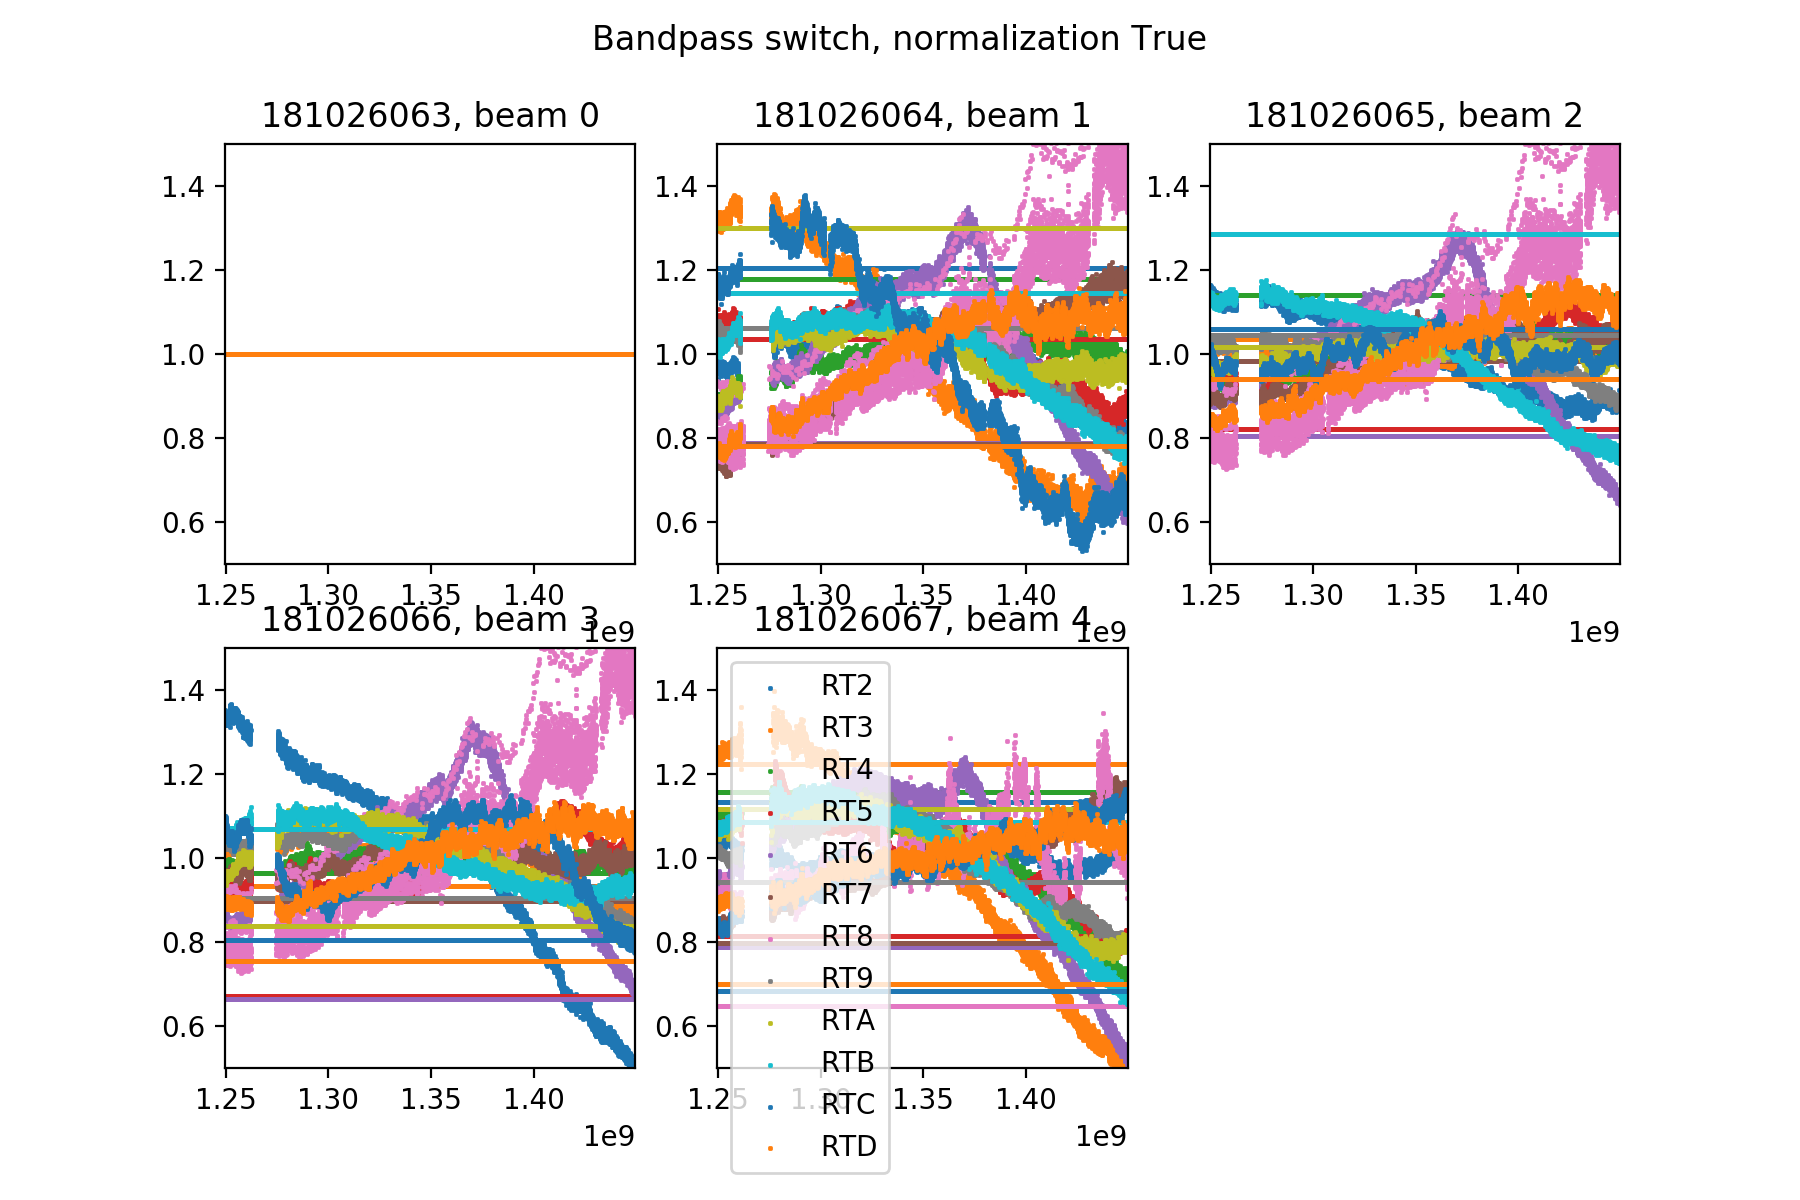

In [9]:
#plot the bandpass solutions for scans
#can choose to plot amplitude or phase
#can choose to normalize to a reference or not
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
fig = cc.plot_compare_bp_beam(scans,obsrecordfile,basedir,norm=True,
                         refscan='181026063',plotmode='amp',pol=0,nx=3,ymin=0.5,ymax=1.5,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_bp_amp_norm.png')

Reminder: Make sure observation record is up-to-date!
In switching scan mode
Reminder: Make sure observation record is up-to-date!
In switching scan mode
Will normalize solutions
plotting phase solutions


<IPython.core.display.Javascript object>


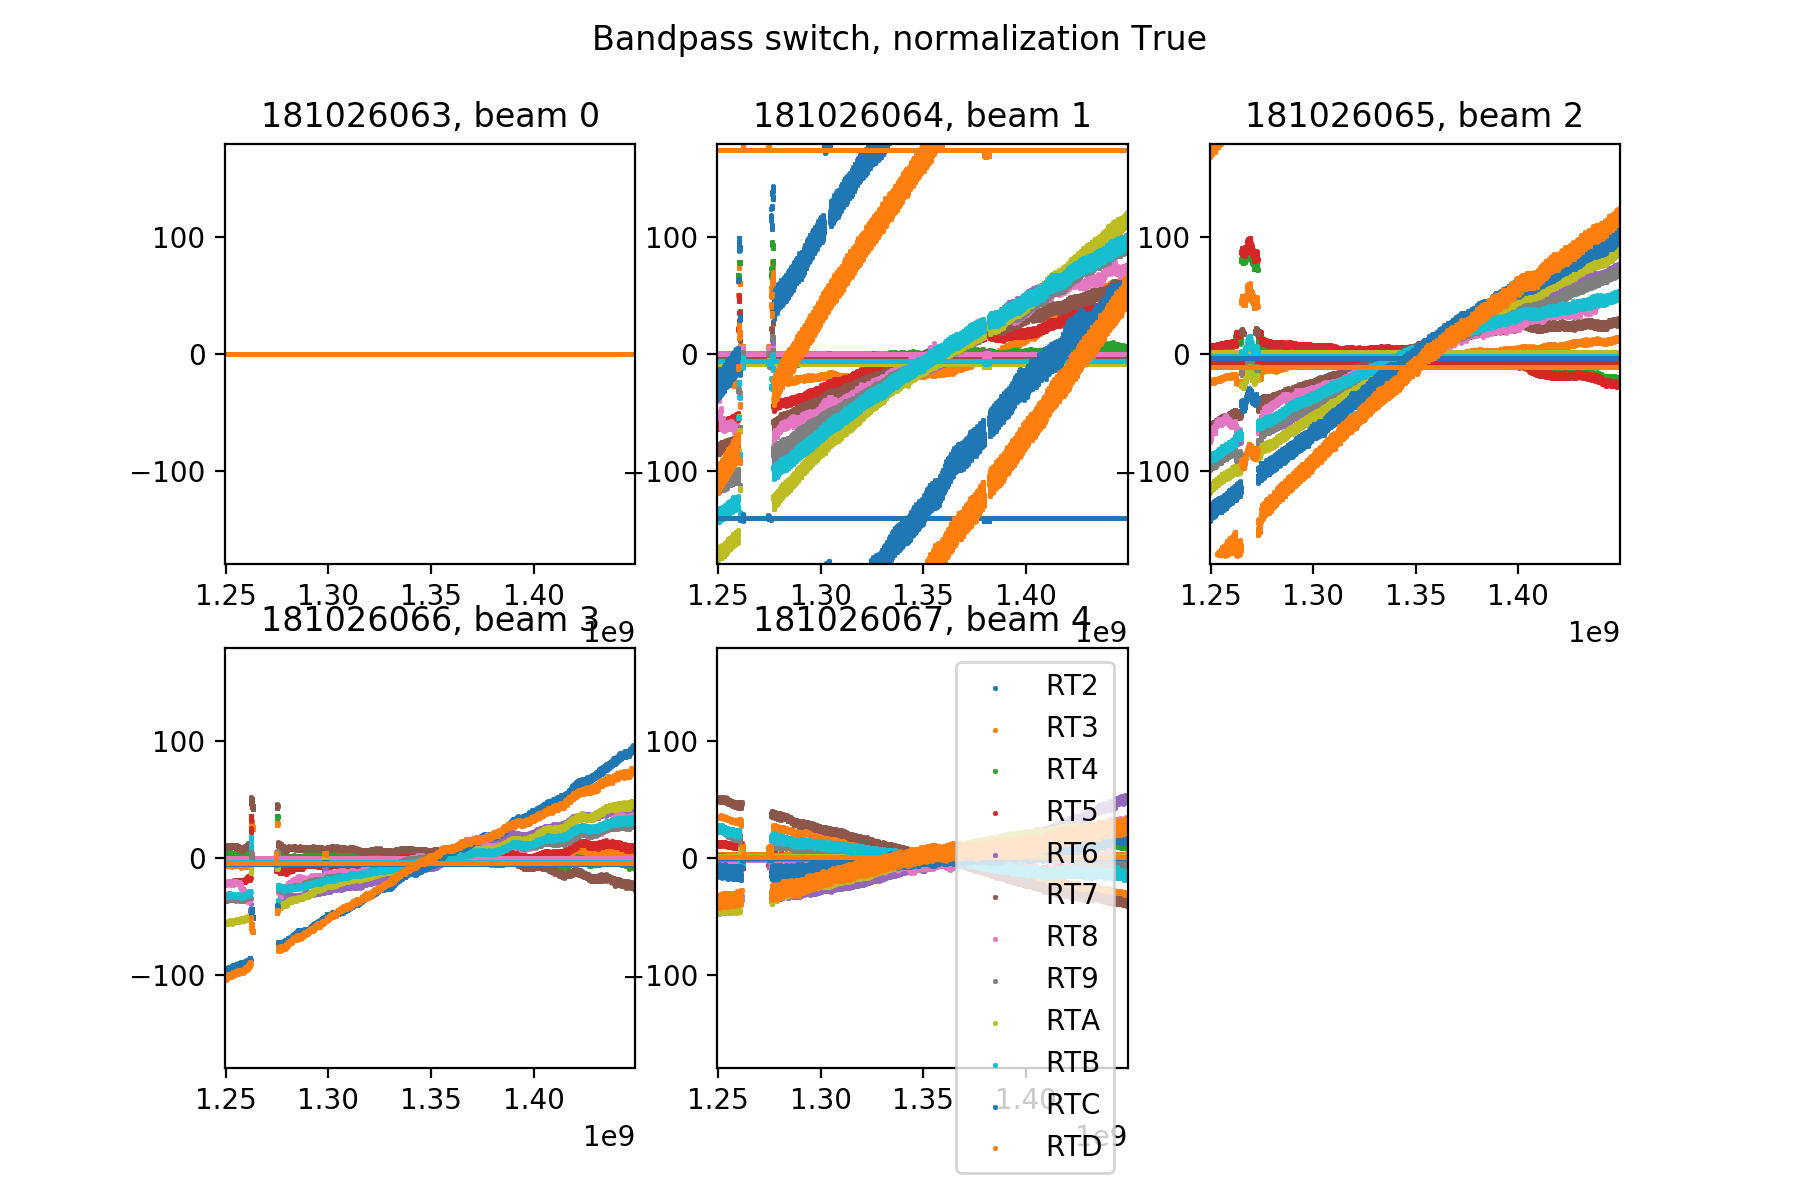

In [11]:
#plot bandpass phases

fig = cc.plot_compare_bp_beam(scans,obsrecordfile,basedir,norm=True,
                         refscan='181026063',plotmode='phase',pol=0,nx=3,ymin=-180,ymax=180,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_bp_phase_norm.png')

Reminder: Make sure observation record is up-to-date!
In switching scan mode
Reminder: Make sure observation record is up-to-date!
In switching scan mode
(12, 17, 2, 5) (17, 5)
plotting amplitude solutions


<IPython.core.display.Javascript object>


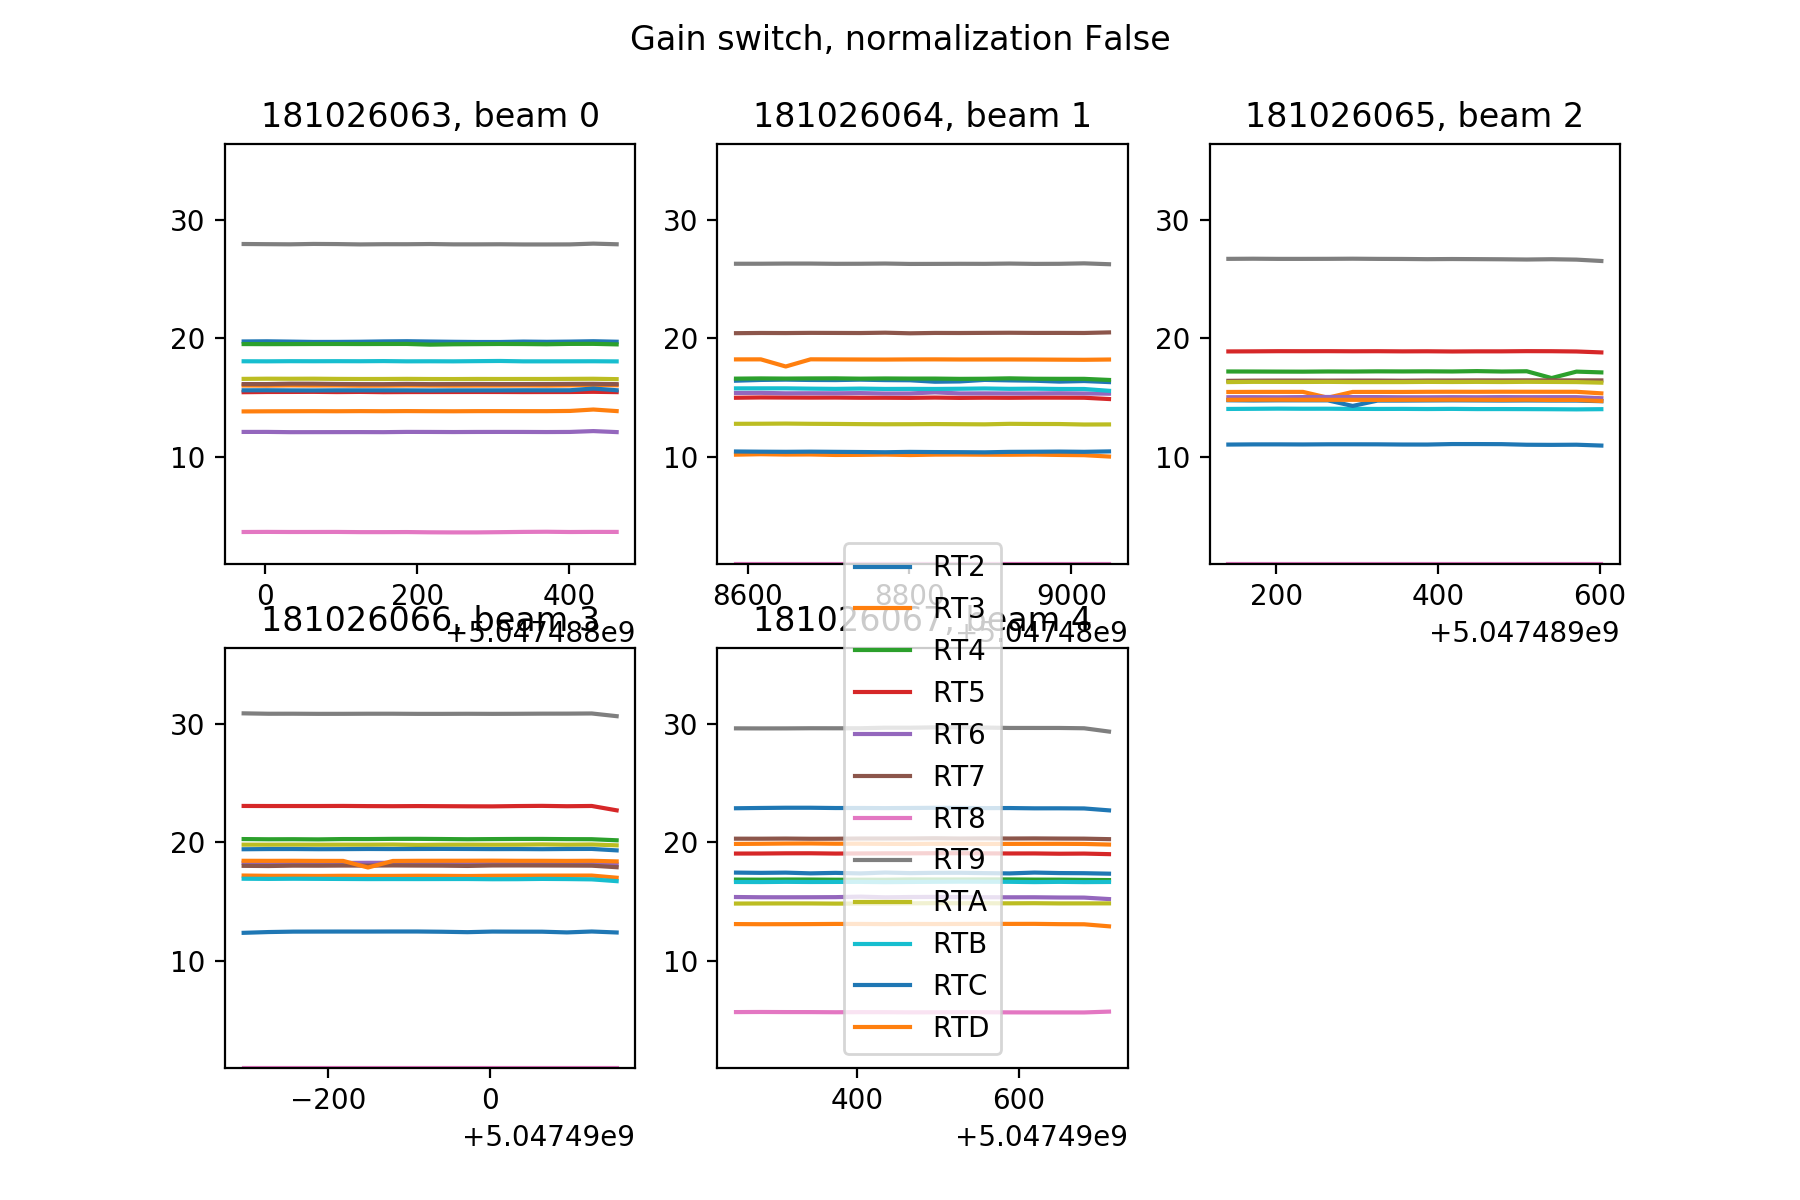

In [14]:
#plot the gain solutions for scans
#can choose to plot amplitude or phase
#can choose to normalize to a reference or not
#can choose polarization index
"""Want to update so that choose stokes param and code identifies index"""
"""Also want to fix display of legend"""
"""Also want to properly format & display times"""
fig = cc.plot_compare_gain_beam(scans,obsrecordfile,basedir,norm=False,
                         refscan='181026063',plotmode='amp',pol=0,nx=3,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_gain_amp.png')

Reminder: Make sure observation record is up-to-date!
In switching scan mode
Reminder: Make sure observation record is up-to-date!
In switching scan mode
(12, 17, 2, 5) (17, 5)
plotting phase solutions


<IPython.core.display.Javascript object>


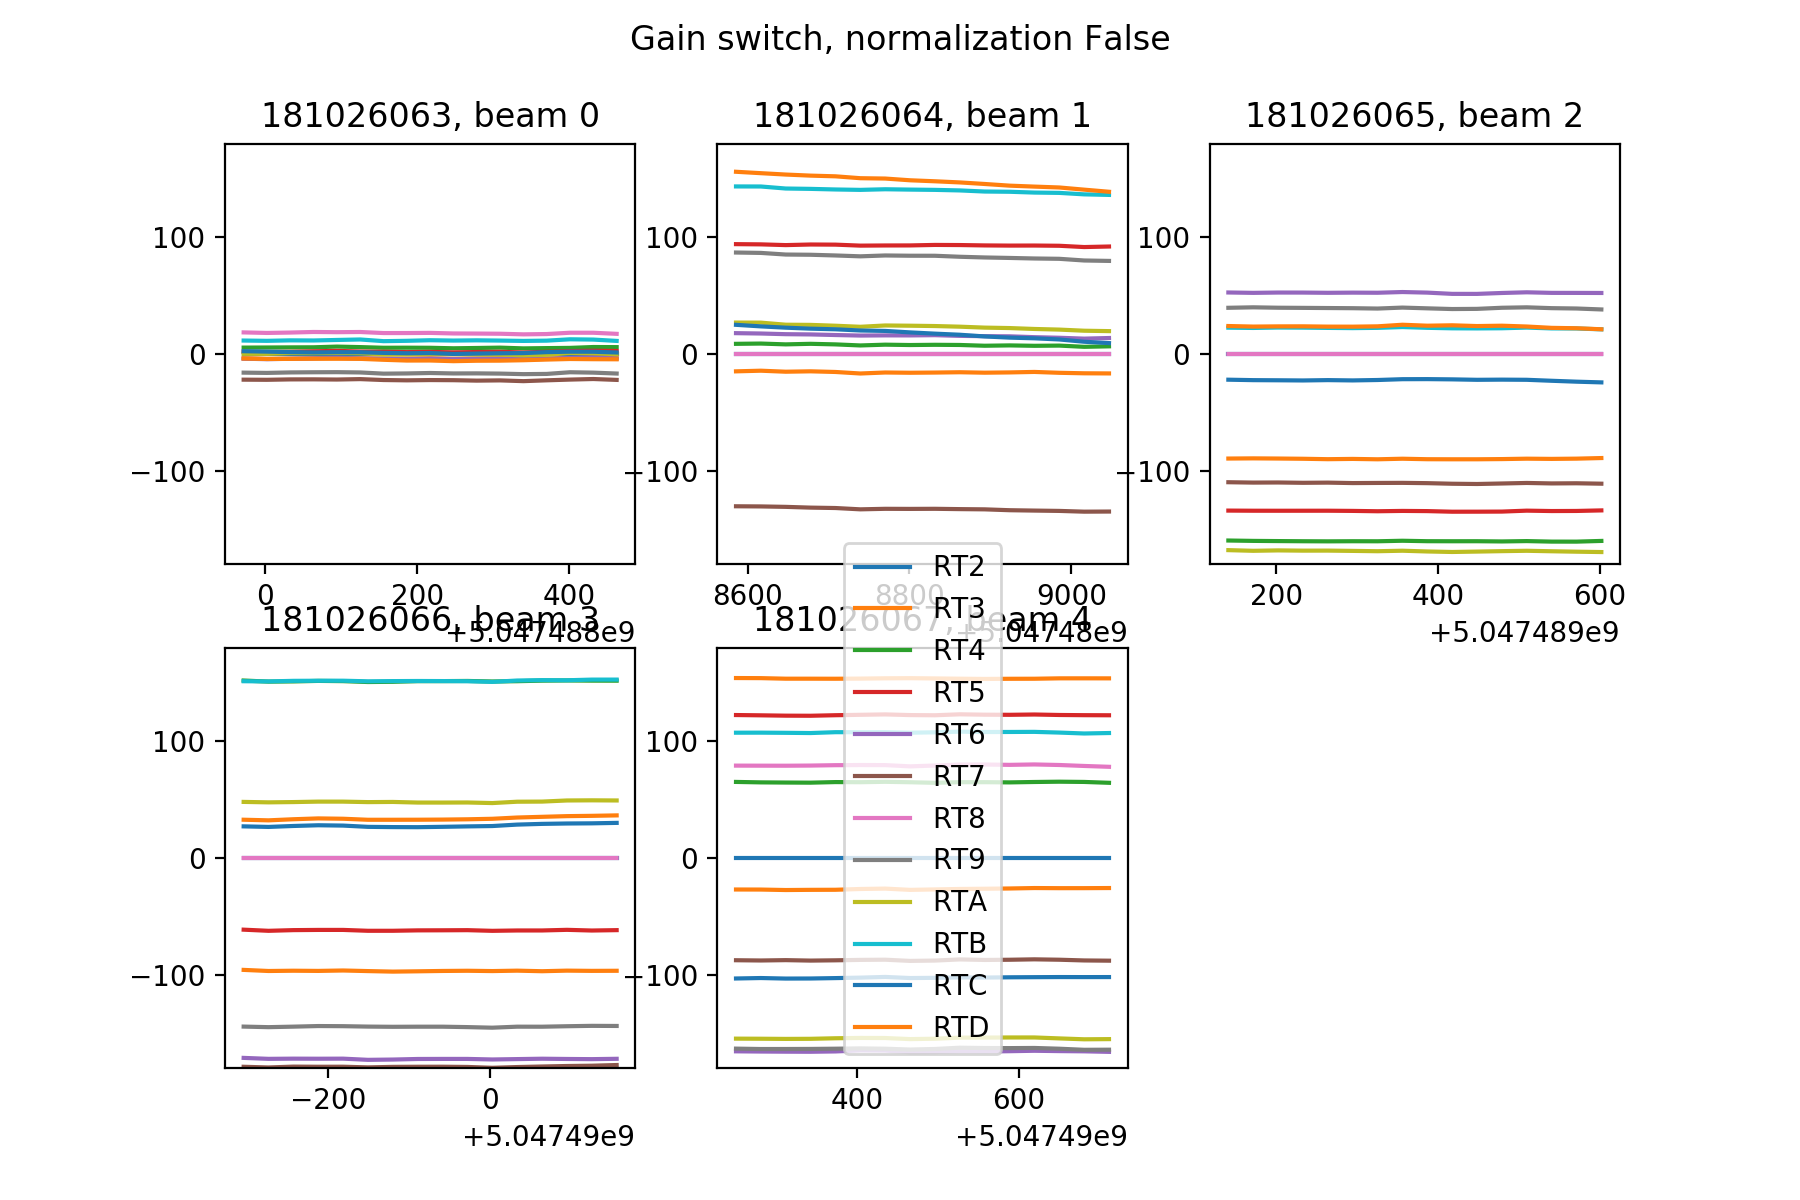

In [15]:
#plot gain phases
fig = cc.plot_compare_gain_beam(scans,obsrecordfile,basedir,norm=False,
                         refscan='181026063',plotmode='phase',pol=0,nx=3,ymin=-180,ymax=180,plotsize=3)
plt.savefig('/home/adams/commissioning/crosscal/img/tutorial_plot_gain_phase.png')